# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [194]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from pprint import pprint
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

weather_api_key

'7de2bf1c4a5f5647604b4b04b33ae3b2'

### Generate the Cities List by Using the `citipy` Library

In [220]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name

    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

cities

Number of cities in the list: 608


['bethel',
 'saipan',
 'puerto natales',
 'sao joao da barra',
 'wailua homesteads',
 'edinburgh of the seven seas',
 'nova vicosa',
 'utrik',
 'ta`u',
 'taizhou',
 'port mathurin',
 'akureyri',
 'harper',
 'iqaluit',
 'toga village',
 'adamstown',
 'waitangi',
 'grytviken',
 'senanga',
 'al bardiyah',
 'port augusta',
 'ribeira brava',
 'chegdomyn',
 'fale old settlement',
 'haro',
 'albany',
 'port alfred',
 'invercargill',
 'nadym',
 'taiohae',
 'badger',
 'pisco',
 'bredasdorp',
 'stanley',
 'aasiaat',
 'puerto san carlos',
 'ilulissat',
 'margaret river',
 'west island',
 'chibougamau',
 'mirabad',
 'bilibino',
 'robore',
 'yellowknife',
 'port-aux-francais',
 'adamovka',
 'puerto ayora',
 'hawaiian paradise park',
 'zhosaly',
 "nar'yan-mar",
 'zheleznogorsk',
 'igarka',
 'bandarbeyla',
 'acapulco de juarez',
 'noumea',
 'bonga',
 'peniche',
 'cotacachi',
 'brokopondo',
 'ushuaia',
 'langxiang',
 'la passe',
 'lospalos',
 'sarkand',
 'vingt cinq',
 'tiksi',
 'petropavlovsk-kamchat

---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [240]:
url = "http://api.openweathermap.org/data/2.5/weather?"
city="longyearbyen"
query_url = f"{url}appid={weather_api_key}&q={city}&units=metric"

# Get weather data
weather_response = requests.get(query_url)
weather_json = weather_response.json()

# Print the response
pprint(f"The weather API responded with: {weather_json}.")

("The weather API responded with: {'coord': {'lon': 15.6401, 'lat': 78.2186}, "
 "'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', "
 "'icon': '04n'}], 'base': 'stations', 'main': {'temp': -2.09, 'feels_like': "
 "-8.19, 'temp_min': -2.09, 'temp_max': -2.09, 'pressure': 1001, 'humidity': "
 "59, 'sea_level': 1001, 'grnd_level': 996}, 'visibility': 10000, 'wind': "
 "{'speed': 6.17, 'deg': 120}, 'clouds': {'all': 75}, 'dt': 1730786854, 'sys': "
 "{'type': 1, 'id': 1663, 'country': 'SJ', 'sunrise': 0, 'sunset': 0}, "
 "'timezone': 3600, 'id': 2729907, 'name': 'Longyearbyen', 'cod': 200}.")


In [242]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"
query_url = f"{url}appid={weather_api_key}"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
pprint("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = query_url  + "&q=" + city + "&units=metric"

    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        print(f"{city_weather}")
        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp =city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city,
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass

    # pause to avoid rate limiting
    time.sleep(1)

# Indicate that Data Loading is complete
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

'Beginning Data Retrieval     '
-----------------------------
Processing Record 1 of Set 1 | bethel
{'coord': {'lon': -73.414, 'lat': 41.3712}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 10.12, 'feels_like': 9.54, 'temp_min': 8.54, 'temp_max': 11.46, 'pressure': 1025, 'humidity': 90, 'sea_level': 1025, 'grnd_level': 1005}, 'visibility': 10000, 'wind': {'speed': 0.89, 'deg': 141, 'gust': 1.34}, 'clouds': {'all': 100}, 'dt': 1730787121, 'sys': {'type': 2, 'id': 2093006, 'country': 'US', 'sunrise': 1730806231, 'sunset': 1730843040}, 'timezone': -18000, 'id': 5282297, 'name': 'Bethel', 'cod': 200}
Processing Record 2 of Set 1 | saipan
{'coord': {'lon': 145.701, 'lat': 15.1355}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 29.25, 'feels_like': 35.21, 'temp_min': 29.25, 'temp_max': 29.39, 'pressure': 1010, 'humidity': 79, 's

In [244]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)
max_temps = city_data_df["Max Temp"]
# Show Record Count
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

#city_data_df.to_csv(output_data_file, index_label="City_ID")
city_data_df.count()

City          582
Lat           582
Lng           582
Max Temp      582
Humidity      582
Cloudiness    582
Wind Speed    582
Country       582
Date          582
dtype: int64

In [246]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,bethel,41.3712,-73.4140,11.46,90,100,0.89,US,1730787121
1,saipan,15.1355,145.7010,29.39,79,75,5.14,MP,1730787122
2,puerto natales,-51.7236,-72.4875,1.73,82,17,3.13,CL,1730787123
3,sao joao da barra,-21.6403,-41.0511,23.35,87,100,7.08,BR,1730787124
4,wailua homesteads,22.0669,-159.3780,23.40,93,34,2.49,US,1730787125


In [248]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [250]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,bethel,41.3712,-73.4140,11.46,90,100,0.89,US,1730787121
1,saipan,15.1355,145.7010,29.39,79,75,5.14,MP,1730787122
2,puerto natales,-51.7236,-72.4875,1.73,82,17,3.13,CL,1730787123
3,sao joao da barra,-21.6403,-41.0511,23.35,87,100,7.08,BR,1730787124
4,wailua homesteads,22.0669,-159.3780,23.40,93,34,2.49,US,1730787125


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

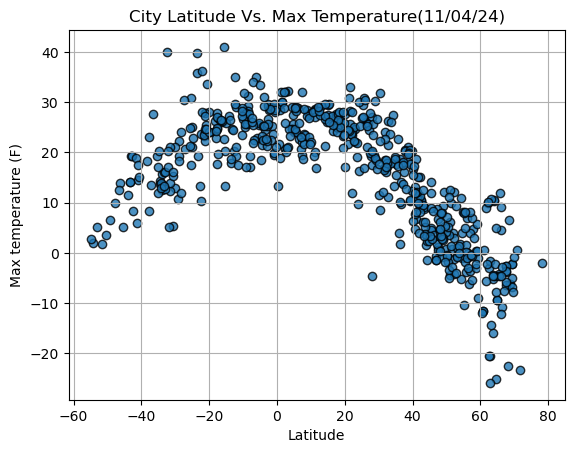

In [252]:
# Build scatter plot for latitude vs. temperature
# YOUR CODE HERE
plt.scatter(lats,
            max_temps,
            edgecolor="black",linewidth=1, 
            alpha=0.8, label="cities")
# Incorporate the other graph properties
# YOUR CODE HERE
plt.title("City Latitude Vs. Max Temperature(%s)"%time.strftime("%x"))
plt.ylabel("Max temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

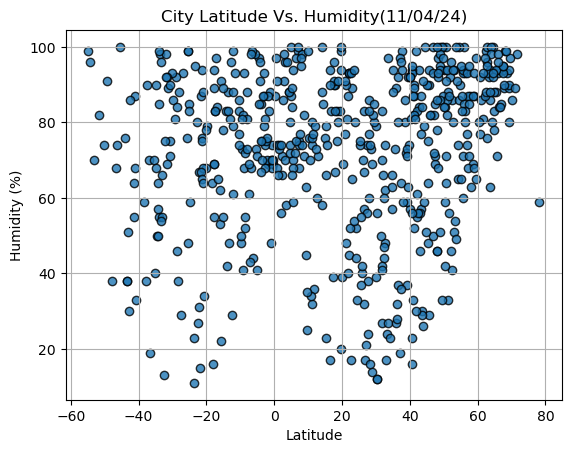

In [254]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(lats,
            humidity,
           edgecolor="black", linewidth=1, 
           alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title("City Latitude Vs. Humidity(%s)" % time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

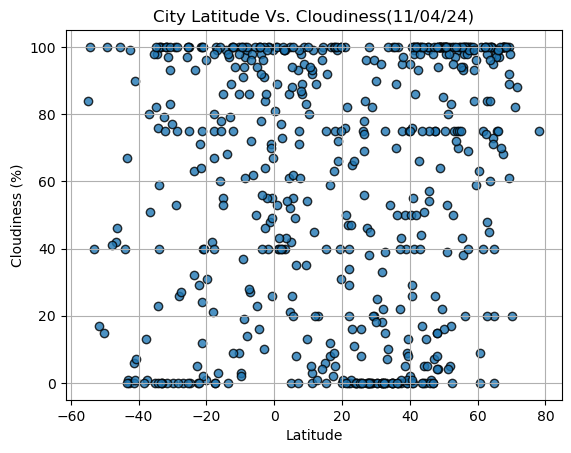

In [256]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(lats,
            cloudiness,
           edgecolor="black", linewidth=1,
           alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title("City Latitude Vs. Cloudiness(%s)" % time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

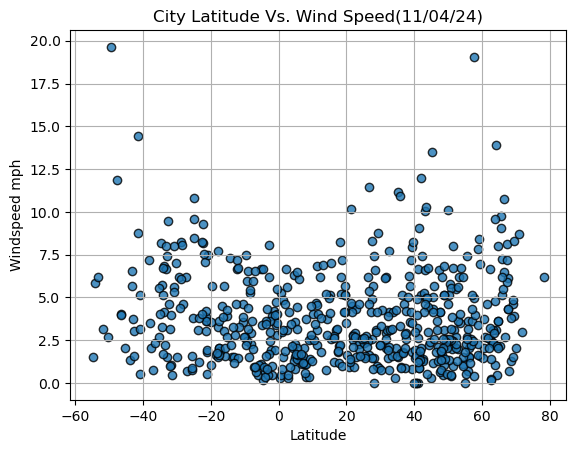

In [258]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(lats,
            wind_speed,
           edgecolor="black", linewidth=1, 
           alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title("City Latitude Vs. Wind Speed(%s)" % time.strftime("%x"))
plt.ylabel("Windspeed mph")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [260]:
# Define a function to create Linear Regression plots
def plot_linear_regression(x_values,y_values,title,text_coordinates,x_title,y_title):
    
    # Run regression on Southern Hemisphere
    (slope, intercept, rvalue, pvalue, stderr) = linregress (x_values,y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + " x + " + str(round(intercept,2))
    
    # Plot
    plt.scatter(x_values,y_values)
    plt.plot(x_values, regress_values, "r-")
    plt.annotate(line_eq,text_coordinates, fontsize=15, color="red")
    plt.xlabel(x_title)
    plt.ylabel(y_title)
    print(f"The r-squared is: {rvalue}")
    plt.show()

The r-squared is: -0.8643216691101183


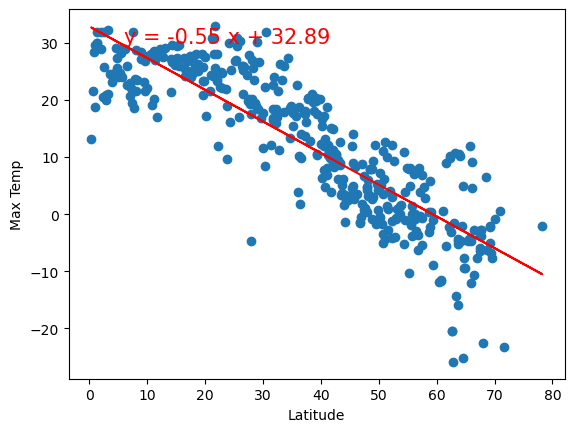

In [262]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] <0)]

# Display sample data
northern_hemi_df.head()

x_values = northern_hemi_df ["Lat"]
y_values = northern_hemi_df ["Max Temp"]
plot_linear_regression(x_values,y_values, 'Max Temp', (6,30),'Latitude','Max Temp')

The r-squared is: 0.20957563263190815


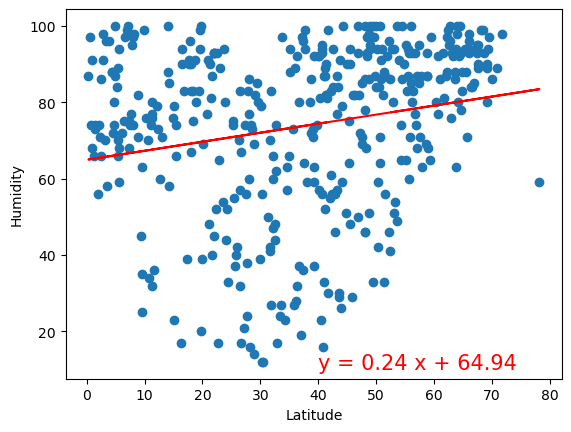

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,bethel,41.3712,-73.4140,11.46,90,100,0.89,US,1730787121
1,saipan,15.1355,145.7010,29.39,79,75,5.14,MP,1730787122
4,wailua homesteads,22.0669,-159.3780,23.40,93,34,2.49,US,1730787125
7,utrik,11.2278,169.8474,28.56,80,92,6.85,MH,1730787129
9,taizhou,32.4933,119.9106,17.11,44,0,4.14,CN,1730787131


In [264]:
# Create a DataFrame with the Northern Hemisphere data 
x_values = northern_hemi_df ["Lat"]
y_values = northern_hemi_df ["Humidity"]
plot_linear_regression(x_values,y_values, 'Humidity', (40,10),'Latitude','Humidity')

# Display sample data
northern_hemi_df.head()

###  Temperature vs. Latitude Linear Regression Plot

The r-squared is: -0.8643216691101183


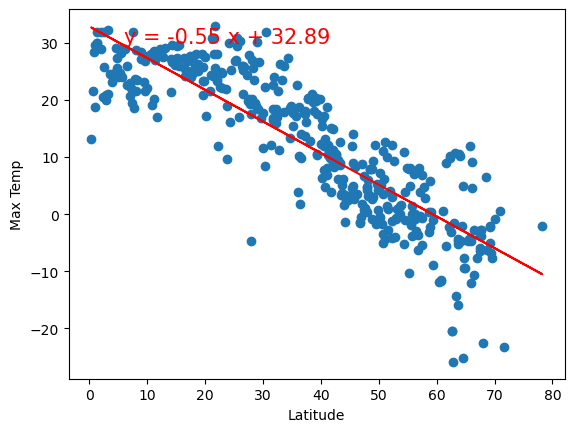

In [266]:
# Linear regression on Northern Hemisphere
x_values = northern_hemi_df ["Lat"]
y_values = northern_hemi_df ["Max Temp"]
plot_linear_regression(x_values,y_values, 'Max Temp', (6,30),'Latitude','Max Temp')

In [ ]:
# Linear regression on Southern Hemisphere
x_values = southern_hemi_df ["Lat"]
y_values = southern_hemi_df ["Max Temp"]
plot_linear_regression(x_values,y_values, 'Max Temp', (-30,40),'Latitude','Max Temp')

**Discussion about the linear relationship:** The correlation between Temperature and Latitude is stornger in the Northen hemisphere as opposed to the southern hemisphere .

### Humidity vs. Latitude Linear Regression Plot

The r-squared is: 0.20957563263190815


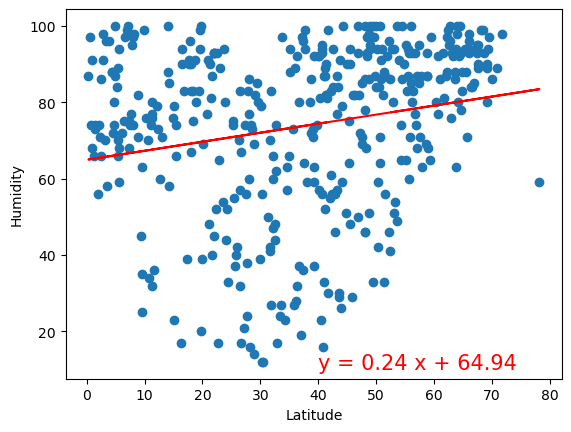

In [268]:
# Northern Hemisphere
x_values = northern_hemi_df ["Lat"]
y_values = northern_hemi_df ["Humidity"]
plot_linear_regression(x_values,y_values, 'Humidity', (40,10),'Latitude','Humidity')

The r-squared is: 0.10245192925239194


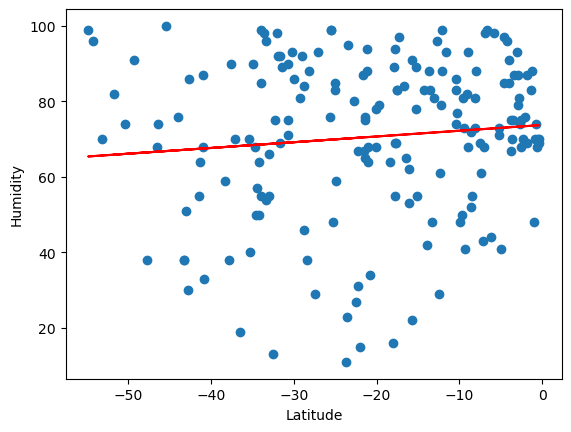

In [270]:
# Southern Hemisphere
x_values = southern_hemi_df ["Lat"]
y_values = southern_hemi_df ["Humidity"]
plot_linear_regression(x_values,y_values, 'Humidity', (-30,150),'Latitude','Humidity')

**Discussion about the linear relationship:** The correlation between Humidity and Latitude is consistent in both the Northern Hemisphere and the southern Hemisphere .

### Cloudiness vs. Latitude Linear Regression Plot

The r-squared is: 0.24005672644087014


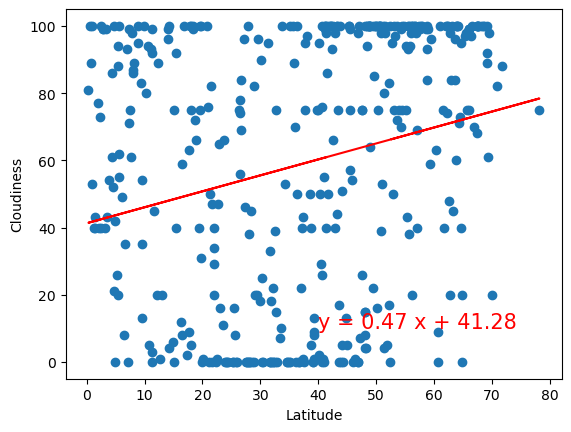

In [272]:
# Northern Hemisphere
x_values = northern_hemi_df ["Lat"]
y_values = northern_hemi_df ["Cloudiness"]
plot_linear_regression(x_values,y_values, 'Cloudiness', (40,10),'Latitude','Cloudiness')

The r-squared is: 0.21482615339200034


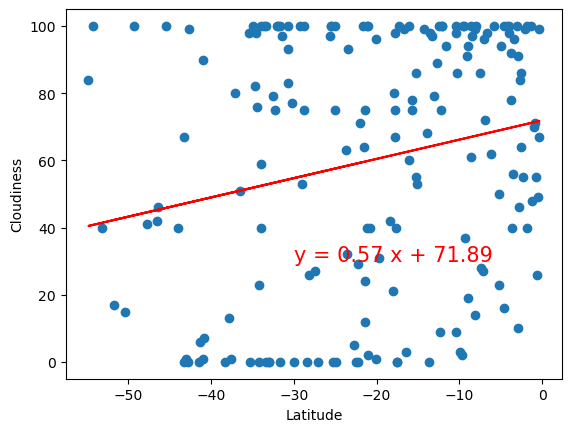

In [274]:
x_values = southern_hemi_df ["Lat"]
y_values = southern_hemi_df ["Cloudiness"]
plot_linear_regression(x_values,y_values, 'Cloudiness', (-30,30),'Latitude','Cloudiness')

**Discussion about the linear relationship:** The relationship between Cloudiness and Latitude is Random and has some uncertainity.

### Wind Speed vs. Latitude Linear Regression Plot

The r-squared is: 0.155419517806714


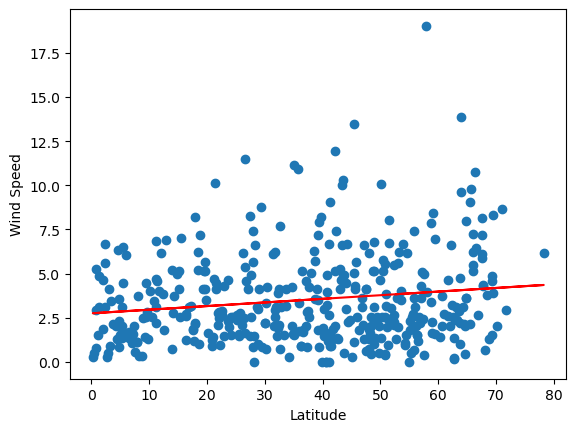

In [276]:
# Northern Hemisphere
x_values = northern_hemi_df ["Lat"]
y_values = northern_hemi_df ["Wind Speed"]
plot_linear_regression(x_values,y_values, 'Wind Speed', (40,25),'Latitude','Wind Speed')

The r-squared is: -0.27228847547638824


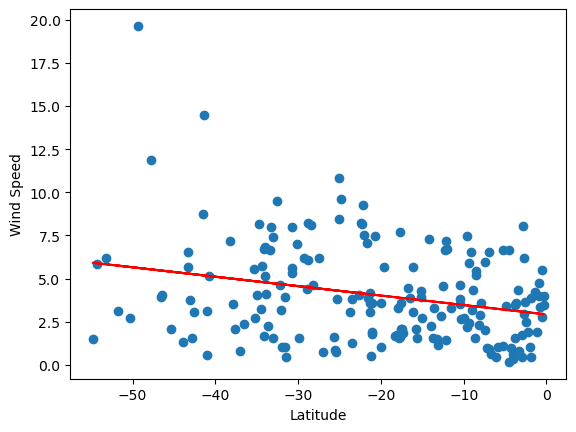

In [278]:
# Southern Hemisphere
x_values = southern_hemi_df ["Lat"]
y_values = southern_hemi_df ["Wind Speed"]
plot_linear_regression(x_values,y_values, 'Wind Speed', (-30,30),'Latitude','Wind Speed')

**Discussion about the linear relationship:** The correlation between wind speed and Latitude is stronger in the Northern Hemisphere as opposed to the southern Hemisphere , with both plots indicating that wind speed lowers as we approach the equator.